In [ ]:
# homework 1 ex 2
# Загрузите временной ряд (например, данные о ценах на акции) и создайте модель регрессии, для прогнозирования будущих значений.
# 
# 
#
# 
#

2025-03-10 21:40:26.300696 load csv
         open   close    high     low                Date  target
1      1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00 -0.0009
2      1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00  0.0005
3      1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00 -0.0004
4      1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00  0.0002
5      1.4657  1.4663  1.4669  1.4650 2008-01-02 11:15:00  0.0008
...       ...     ...     ...     ...                 ...     ...
24409  1.3965  1.3898  1.3966  1.3890 2008-12-31 16:45:00 -0.0066
24410  1.3896  1.3917  1.3932  1.3887 2008-12-31 17:00:00  0.0019
24411  1.3919  1.3971  1.3971  1.3915 2008-12-31 17:15:00  0.0054
24412  1.3974  1.3956  1.3984  1.3954 2008-12-31 17:30:00 -0.0015
24413  1.3957  1.3917  1.3957  1.3914 2008-12-31 17:45:00 -0.0039

[24413 rows x 6 columns]
     open   close    high     low                Date  target
1  1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00 -0.0009
2  1.4651  1.4657  1.4

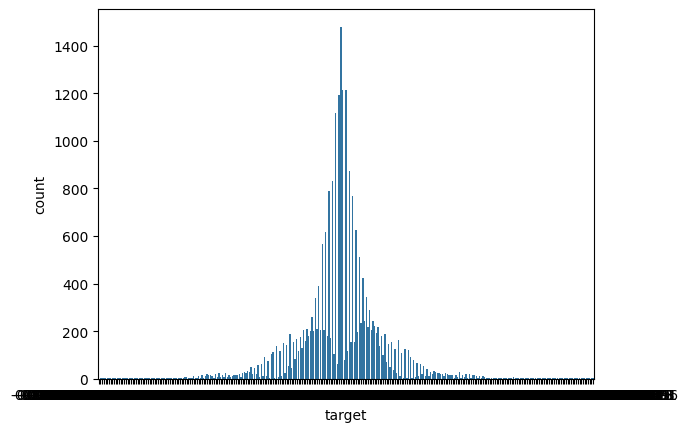

2025-03-10 21:40:29.644339 finish


In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import dill
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pprint import pprint as pprint
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def print_separator(title):
    print("\n" + "="*80)
    print(title)
    print("="*80 + "\n")

def create_target(df, lag=3):
    for i in range(df):
        df[f'target'] = df['close'].shift(i) - df['close'].shift(i-1)
    return df

print(datetime.now(), "load csv")
dataset = pd.read_csv('hw1ex2-rates.csv')
dataset['Date'] = pd.to_datetime(dataset['dt'])

dataset['target'] = dataset['close'] - dataset['close'].shift(1)
dataset = dataset.drop(columns=['dt'])
dataset.dropna(inplace=True)

print(dataset)
print(dataset.head())
print(dataset.info())
print(dataset.describe())

#X = dataset[['open','close','high','low']]
#y = dataset['target']
#print(X)
#print(y.info())
#print(y.describe())


print_separator("Распределение классов")
sns.countplot(x=dataset['target'])
plt.show()





print(datetime.now(), "finish")


Распределение классов по значению

         open   close    high     low                Date  target target_cl  \
1      1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00 -0.0009        C1   
2      1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00  0.0005        C5   
3      1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00 -0.0004        C2   
4      1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00  0.0002        C4   
5      1.4657  1.4663  1.4669  1.4650 2008-01-02 11:15:00  0.0008        C5   
...       ...     ...     ...     ...                 ...     ...       ...   
24409  1.3965  1.3898  1.3966  1.3890 2008-12-31 16:45:00 -0.0066        C1   
24410  1.3896  1.3917  1.3932  1.3887 2008-12-31 17:00:00  0.0019        C6   
24411  1.3919  1.3971  1.3971  1.3915 2008-12-31 17:15:00  0.0054        C6   
24412  1.3974  1.3956  1.3984  1.3954 2008-12-31 17:30:00 -0.0015        C1   
24413  1.3957  1.3917  1.3957  1.3914 2008-12-31 17:45:00 -0.0039        C1   

             ta

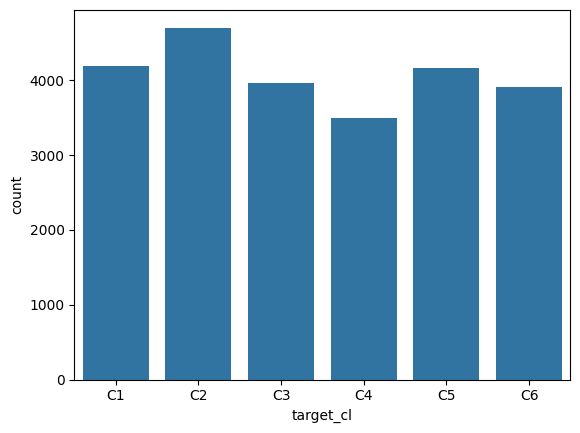

['-0.0003-0.0' '-0.0009--0.0003' '-0.0222--0.0009' '0.0-0.0003'
 '0.0003-0.0009' '0.0009-0.018']

Распределение классов по дате

         open   close    high     low                Date  target target_cl  \
1      1.4660  1.4652  1.4661  1.4651 2008-01-02 10:15:00 -0.0009        C1   
2      1.4651  1.4657  1.4657  1.4651 2008-01-02 10:30:00  0.0005        C5   
3      1.4656  1.4653  1.4657  1.4650 2008-01-02 10:45:00 -0.0004        C2   
4      1.4652  1.4655  1.4663  1.4650 2008-01-02 11:00:00  0.0002        C4   
5      1.4657  1.4663  1.4669  1.4650 2008-01-02 11:15:00  0.0008        C5   
...       ...     ...     ...     ...                 ...     ...       ...   
24409  1.3965  1.3898  1.3966  1.3890 2008-12-31 16:45:00 -0.0066        C1   
24410  1.3896  1.3917  1.3932  1.3887 2008-12-31 17:00:00  0.0019        C6   
24411  1.3919  1.3971  1.3971  1.3915 2008-12-31 17:15:00  0.0054        C6   
24412  1.3974  1.3956  1.3984  1.3954 2008-12-31 17:30:00 -0.0015        C1   
24

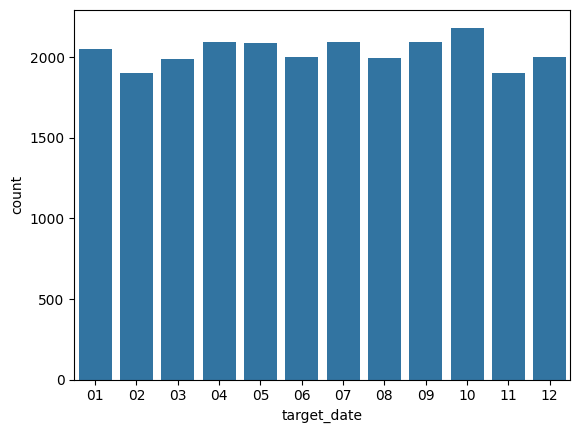

In [2]:
print_separator("Распределение классов по значению")
dataset['target_cl'] = pd.qcut(dataset['target'], q=6, labels=['C1', 'C2', 'C3', 'C4', 'C5', 'C6'])
dataset['target_range'] = pd.qcut(dataset['target'], q=6)
dataset['range_name'] = dataset['target_range'].apply(lambda x: f"{x.left}-{x.right}")
print(dataset)
print(dataset.info())
sns.countplot(x=dataset['target_cl'])
plt.show()

labels_val = pd.unique(dataset[['range_name']].values.ravel())
labels_vals = np.sort(labels_val)
print(labels_vals)

print_separator("Распределение классов по дате")
rng_b = [datetime.strptime('2008.01.01 00:00', '%Y.%m.%d %H:%M'), 
       datetime.strptime('2008.02.01 00:00', '%Y.%m.%d %H:%M'), 
       datetime.strptime('2008.03.01 00:00', '%Y.%m.%d %H:%M'), 
       datetime.strptime('2008.04.01 00:00', '%Y.%m.%d %H:%M'), 
       datetime.strptime('2008.05.01 00:00', '%Y.%m.%d %H:%M'), 
       datetime.strptime('2008.06.01 00:00', '%Y.%m.%d %H:%M'),
       datetime.strptime('2008.07.01 00:00', '%Y.%m.%d %H:%M'),
       datetime.strptime('2008.08.01 00:00', '%Y.%m.%d %H:%M'),
       datetime.strptime('2008.09.01 00:00', '%Y.%m.%d %H:%M'),
       datetime.strptime('2008.10.01 00:00', '%Y.%m.%d %H:%M'),
       datetime.strptime('2008.11.01 00:00', '%Y.%m.%d %H:%M'),
       datetime.strptime('2008.12.01 00:00', '%Y.%m.%d %H:%M'),
       datetime.strptime('2009.01.01 00:00', '%Y.%m.%d %H:%M')]  # Определяем границы диапазонов
labels = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']  # Метки для диапазонов
dataset['target_date'] = pd.cut(dataset['Date'], bins=rng_b, labels=labels, right=False)
print(dataset)

print(dataset)
print(dataset.info())
sns.countplot(x=dataset['target_date'])
plt.show()






Ищем выбросы по значению

target_cl      C1      C2  C3      C4      C5      C6
1         -0.0009     NaN NaN     NaN     NaN     NaN
2             NaN     NaN NaN     NaN  0.0005     NaN
3             NaN -0.0004 NaN     NaN     NaN     NaN
4             NaN     NaN NaN  0.0002     NaN     NaN
5             NaN     NaN NaN     NaN  0.0008     NaN
...           ...     ...  ..     ...     ...     ...
24409     -0.0066     NaN NaN     NaN     NaN     NaN
24410         NaN     NaN NaN     NaN     NaN  0.0019
24411         NaN     NaN NaN     NaN     NaN  0.0054
24412     -0.0015     NaN NaN     NaN     NaN     NaN
24413     -0.0039     NaN NaN     NaN     NaN     NaN

[24413 rows x 6 columns]


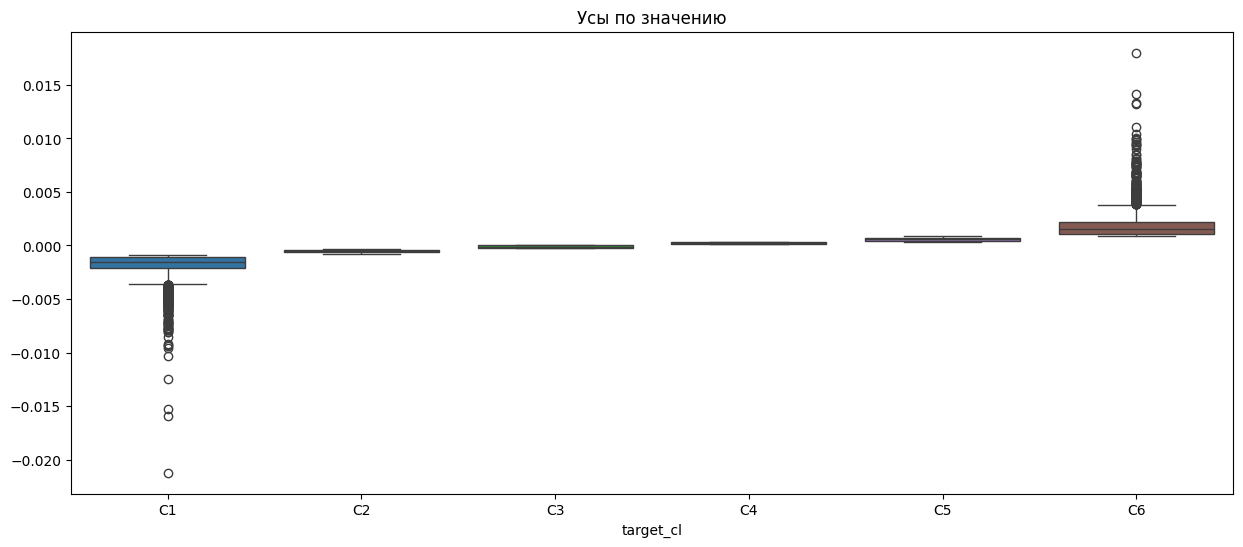


Ищем выбросы по дате

target_date      01  02  03  04  05  06  07  08  09  10  11      12
1           -0.0009 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN
2            0.0005 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN
3           -0.0004 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN
4            0.0002 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN
5            0.0008 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN     NaN
...             ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..     ...
24409           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN -0.0066
24410           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  0.0019
24411           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  0.0054
24412           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN -0.0015
24413           NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN -0.0039

[24413 rows x 12 columns]


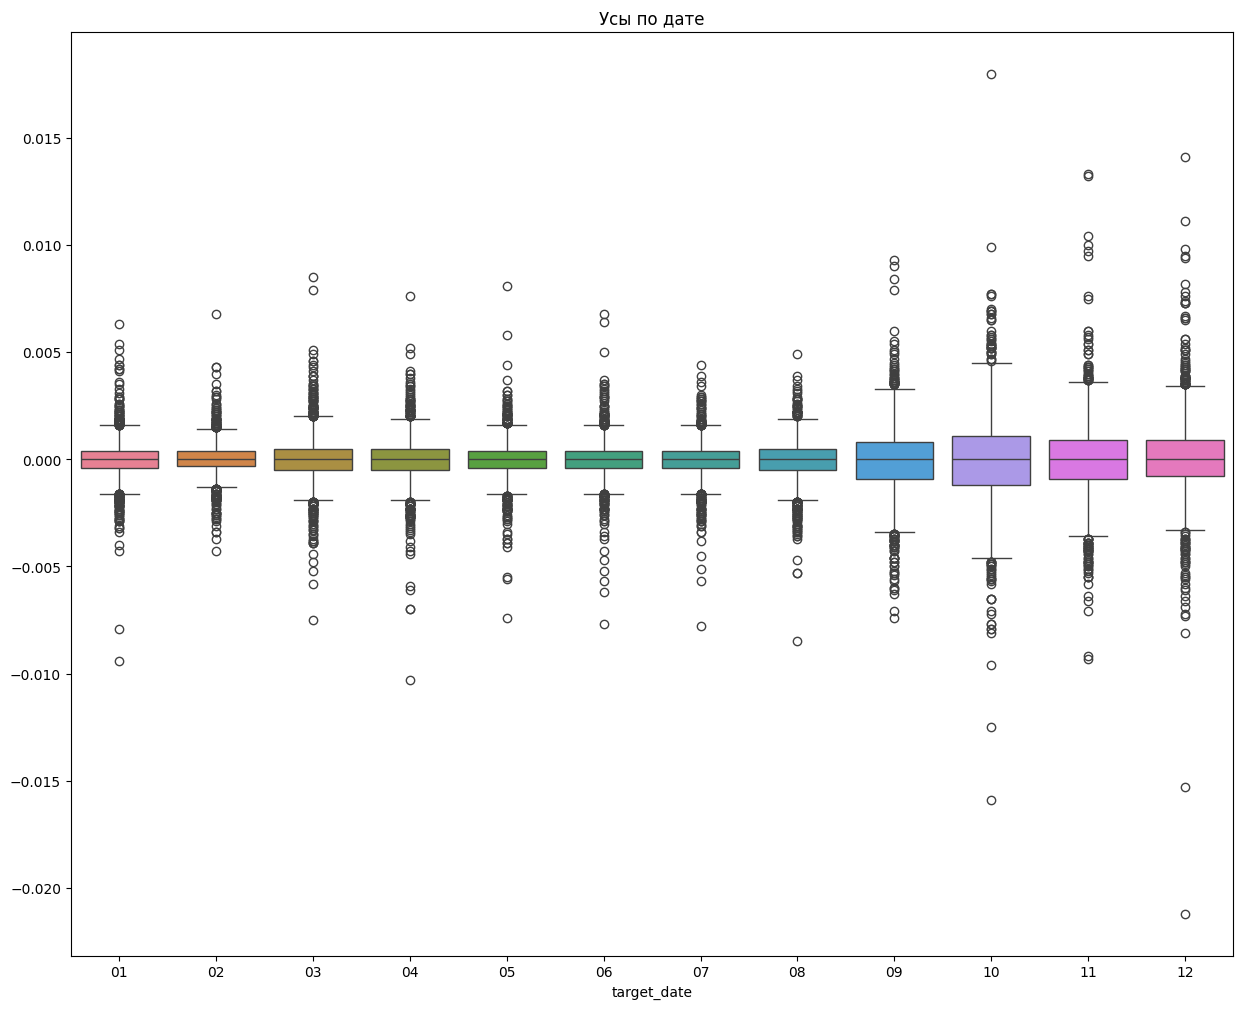

{'C1': 265, 'C2': 0, 'C3': 0, 'C4': 0, 'C5': 0, 'C6': 201}
{'01': 145,
 '02': 126,
 '03': 139,
 '04': 120,
 '05': 119,
 '06': 127,
 '07': 121,
 '08': 113,
 '09': 92,
 '10': 72,
 '11': 95,
 '12': 114}
2025-03-10 21:42:25.781694 finish


In [3]:
def count_outliers(df, col_names):
    outliers = {}
    for column in df.columns:
        if column in col_names:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
            outliers[column] = outliers_count
    return outliers

print_separator("Ищем выбросы по значению")
ds = dataset[['target', 'target_cl']]
ds_p = ds.pivot(columns="target_cl", values="target")
print(ds_p)
plt.figure(figsize=(15, 6))
sns.boxplot(data=ds_p)
plt.title('Усы по значению')
plt.show()

print_separator("Ищем выбросы по дате")



ds_d = dataset[['target', 'target_date']]
ds_pd = ds_d.pivot(columns="target_date", values="target")
print(ds_pd)
plt.figure(figsize=(15, 12))
sns.boxplot(data=ds_pd)
plt.title('Усы по дате')
plt.show()

outliers_count_date = count_outliers(ds_pd, labels)
outliers_count_c = count_outliers(ds_p, ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'])

pprint(outliers_count_c)
pprint(outliers_count_date)

print(datetime.now(), "finish")

In [4]:
def remove_outliers(df, col_name, rng_name):
    dff = df[df[col_name] == rng_name]
    Q1 = dff['target'].quantile(0.25)
    Q3 = dff['target'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dff[(dff['target'] >= lower_bound) & (dff['target'] <= upper_bound)]

print_separator("Удаляем выбросы по значению")
ds_clear_C1 = remove_outliers(dataset, 'target_cl', 'C1')
ds_clear_C2 = remove_outliers(dataset, 'target_cl', 'C2')
ds_clear_C3 = remove_outliers(dataset, 'target_cl', 'C3')
ds_clear_C4 = remove_outliers(dataset, 'target_cl', 'C4')
ds_clear_C5 = remove_outliers(dataset, 'target_cl', 'C5')
ds_clear_C6 = remove_outliers(dataset, 'target_cl', 'C6')
ds_clear_cl = pd.concat([ds_clear_C1, ds_clear_C2, ds_clear_C3, ds_clear_C4, ds_clear_C5, ds_clear_C6])
outliers_count_c = count_outliers(ds_clear_cl, ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'])

print_separator("Удаляем выбросы по дате")
#'01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'
ds_clear_d01 = remove_outliers(dataset, 'target_date', '01')
ds_clear_d02 = remove_outliers(dataset, 'target_date', '02')
ds_clear_d03 = remove_outliers(dataset, 'target_date', '03')
ds_clear_d04 = remove_outliers(dataset, 'target_date', '04')
ds_clear_d05 = remove_outliers(dataset, 'target_date', '05')
ds_clear_d06 = remove_outliers(dataset, 'target_date', '06')
ds_clear_d07 = remove_outliers(dataset, 'target_date', '07')
ds_clear_d08 = remove_outliers(dataset, 'target_date', '08')
ds_clear_d09 = remove_outliers(dataset, 'target_date', '09')
ds_clear_d10 = remove_outliers(dataset, 'target_date', '10')
ds_clear_d11 = remove_outliers(dataset, 'target_date', '11')
ds_clear_d12 = remove_outliers(dataset, 'target_date', '12')
ds_clear_dt = pd.concat([ds_clear_d01,ds_clear_d02,ds_clear_d03,ds_clear_d04,ds_clear_d05,ds_clear_d06,ds_clear_d07,ds_clear_d08,ds_clear_d09,ds_clear_d10,ds_clear_d11,ds_clear_d12])
outliers_count_dt = count_outliers(ds_clear_dt, ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])

print("outliers_count_c:")
print(outliers_count_c)
print("ds_clear_cl:")
print(ds_clear_cl.info())

print("outliers_count_dt:")
print(outliers_count_dt)
print("ds_clear_dt:")
print(ds_clear_dt.info())

print("dataset:")
print(dataset.info())







Удаляем выбросы по значению


Удаляем выбросы по дате

outliers_count_c:
{}
ds_clear_cl:
<class 'pandas.core.frame.DataFrame'>
Index: 23947 entries, 1 to 24410
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   open          23947 non-null  float64       
 1   close         23947 non-null  float64       
 2   high          23947 non-null  float64       
 3   low           23947 non-null  float64       
 4   Date          23947 non-null  datetime64[ns]
 5   target        23947 non-null  float64       
 6   target_cl     23947 non-null  category      
 7   target_range  23947 non-null  category      
 8   range_name    23947 non-null  category      
 9   target_date   23947 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(5)
memory usage: 1.4 MB
None
outliers_count_dt:
{}
ds_clear_dt:
<class 'pandas.core.frame.DataFrame'>
Index: 23030 entries, 1 to 24412
Data columns (total 10 

In [ ]:
# LinearRegression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

def create_lag_features(df, lag=5):
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df['close'].shift(i)
    return df

test_size = 0.2
print_separator("LinearRegression необработанный датасет")
print("create_lag")
dataset_lag = create_lag_features(dataset, lag=5)
dataset_lag.dropna(inplace=True)

X = dataset_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = dataset_lag['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) #, stratify=y

model_ohl = LinearRegression()
print(datetime.now(), "train ...")
model_ohl.fit(X_train, y_train)
print("Предсказание")
y_pred = model_ohl.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

print_separator("LinearRegression по значению")
print("create_lag")
ds_clear_cl_lag = create_lag_features(ds_clear_cl, lag=5)
ds_clear_cl_lag.dropna(inplace=True)

X = ds_clear_cl_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = ds_clear_cl_lag['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) #, stratify=y

model_ohl = LinearRegression()
print(datetime.now(), "train ...")
model_ohl.fit(X_train, y_train)
print("Предсказание")
y_pred = model_ohl.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

print_separator("LinearRegression по дате")
print("create_lag")
ds_clear_dt_lag = create_lag_features(ds_clear_dt, lag=5)
ds_clear_dt_lag.dropna(inplace=True)

X = ds_clear_dt_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = ds_clear_dt_lag['close']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) #, stratify=y

model_ohl = LinearRegression()
print(datetime.now(), "train ...")
model_ohl.fit(X_train, y_train)
print("Предсказание")
y_pred = model_ohl.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")



LinearRegression необработанный датасет

create_lag
2025-03-10 21:50:42.086251 train ...
Предсказание
Оценка модели
MSE: 2.737101141127229e-07
MAE: 0.0003651367747170119
R^2 Score: 0.9999742417585449

LinearRegression по значению

create_lag
2025-03-10 21:50:42.133112 train ...
Предсказание
Оценка модели
MSE: 2.447299476864625e-07
MAE: 0.00035221516282052027
R^2 Score: 0.9999776962685738

LinearRegression по дате

create_lag
2025-03-10 21:50:42.170860 train ...
Предсказание
Оценка модели
MSE: 2.333537879315343e-07
MAE: 0.00033961011912233413
R^2 Score: 0.9999784509166182


In [ ]:
# LinearRegression с валидационной выборкой

In [14]:
print_separator("LinearRegression по дате с валидационной выборкой")
print("create_lag")
ds_clear_dt_lag = create_lag_features(ds_clear_dt, lag=5)
ds_clear_dt_lag.dropna(inplace=True)

X = ds_clear_dt_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = ds_clear_dt_lag['close']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model_ohl = LinearRegression()
print(datetime.now(), "train ...")
model_ohl.fit(X_train, y_train)
print("Предсказание val")
y_pred_val = model_ohl.predict(X_val)

print("Оценка модели val")
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")
print()

print("Предсказание test")
y_pred = model_ohl.predict(X_test)

print("Оценка модели test")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")


LinearRegression по дате с валидационной выборкой

create_lag
2025-03-10 21:52:32.179021 train ...
Предсказание val
Оценка модели val
MSE: 2.3634657097842512e-07
MAE: 0.00034549754342026024
R^2 Score: 0.9999777061247499

Предсказание test
Оценка модели test
MSE: 2.302779560001127e-07
MAE: 0.0003385148552479866
R^2 Score: 0.9999782283578199


In [ ]:
# RandomForestRegressor

In [7]:
from sklearn.ensemble import RandomForestRegressor

print_separator("RandomForestRegressor необработанный датасет")
print("create_lag")
dataset_lag = create_lag_features(dataset, lag=5)
dataset_lag.dropna(inplace=True)

X = dataset_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = dataset_lag['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #, stratify=y

model = RandomForestRegressor()
model.fit(X_train, y_train)

print("Предсказание")
y_pred = model.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

print_separator("RandomForestRegressor по значению")
print("create_lag")
ds_clear_cl_lag = create_lag_features(ds_clear_cl, lag=5)
ds_clear_cl_lag.dropna(inplace=True)

X = ds_clear_cl_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = ds_clear_cl_lag['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #, stratify=y

model = RandomForestRegressor()
model.fit(X_train, y_train)

print("Предсказание")
y_pred = model.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")

print_separator("RandomForestRegressor по дате")
ds_clear_dt_lag = create_lag_features(ds_clear_dt, lag=5)
ds_clear_dt_lag.dropna(inplace=True)

X = ds_clear_dt_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = ds_clear_dt_lag['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #, stratify=y

model = RandomForestRegressor()
model.fit(X_train, y_train)

print("Предсказание")
y_pred = model.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2 Score: {r2}")




RandomForestRegressor необработанный датасет

create_lag
Предсказание
Оценка модели
MSE: 4.0651509411284417e-07
MAE: 0.00042535992350772097
R^2 Score: 0.9999613243057071

RandomForestRegressor по значению

create_lag
Предсказание
Оценка модели
MSE: 3.229043510164178e-07
MAE: 0.00039976761347812657
R^2 Score: 0.999970263625643

RandomForestRegressor по дате

Предсказание
Оценка модели
MSE: 3.1586728501086937e-07
MAE: 0.0003959306299782799
R^2 Score: 0.9999708352563662


In [ ]:
# XGBRegressor

In [ ]:
# поиск гиперпараметров


XGBRegressor датасет по датам. Гиперпараметры

create_lag


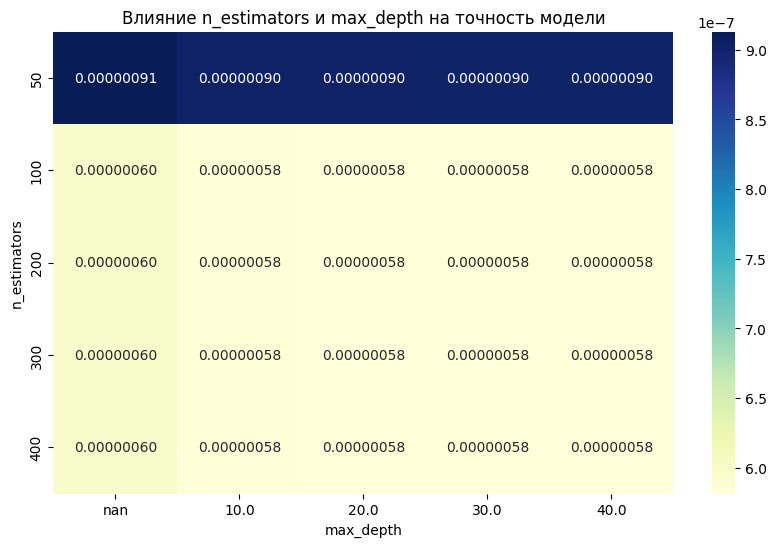

In [10]:
from xgboost import XGBRegressor


print_separator("XGBRegressor датасет по датам. Гиперпараметры")
print("create_lag")
ds_clear_dt_lag = create_lag_features(ds_clear_dt, lag=5)
ds_clear_dt_lag.dropna(inplace=True)

X = ds_clear_dt_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = ds_clear_dt_lag['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #, stratify=y

n_estimators_range = [50, 100, 200, 300, 400]
max_depth_range = [None, 10, 20, 30, 40]

results = []

for n in n_estimators_range:
    for depth in max_depth_range:
        clf = XGBRegressor(objective='reg:squarederror', n_estimators=n, learning_rate=0.1, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        results.append({
            'n_estimators': n,
            'max_depth': depth,
            'mse': mse
        })

results_df = pd.DataFrame(results)

pivot_table = results_df.pivot(index="n_estimators", columns="max_depth", values="mse")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".8f", cmap="YlGnBu")
plt.title("Влияние n_estimators и max_depth на точность модели")
plt.ylabel("n_estimators")
plt.xlabel("max_depth")
plt.show()



In [11]:
from xgboost import XGBRegressor

n_estimators=100
learning_rate=0.1
max_depth=10

print_separator("XGBRegressor необработанный датасет")
print("create_lag")
dataset_lag = create_lag_features(dataset, lag=5)
dataset_lag.dropna(inplace=True)

X = dataset_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = dataset_lag['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #, stratify=y

model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

print("Предсказание")
y_pred = model.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
#print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2}")

print_separator("XGBRegressor по значению")
print("create_lag")
ds_clear_cl_lag = create_lag_features(ds_clear_cl, lag=5)
ds_clear_cl_lag.dropna(inplace=True)

X = ds_clear_cl_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = ds_clear_cl_lag['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #, stratify=y

model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

print("Предсказание")
y_pred = model.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
#print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2}")

print_separator("XGBRegressor по дате")
ds_clear_dt_lag = create_lag_features(ds_clear_dt, lag=5)
ds_clear_dt_lag.dropna(inplace=True)

X = ds_clear_dt_lag[['open', 'high', 'low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = ds_clear_dt_lag['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #, stratify=y

model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

print("Предсказание")
y_pred = model.predict(X_test)

print("Оценка модели")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
#print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2}")



XGBRegressor необработанный датасет

create_lag
Предсказание
Оценка модели
MSE: 6.794706519565833e-07
MAE: 0.000543310237530151
R^2 Score: 0.9999360697520185

XGBRegressor по значению

create_lag
Предсказание
Оценка модели
MSE: 5.681257255474675e-07
MAE: 0.0005045905969933191
R^2 Score: 0.9999471595487075

XGBRegressor по дате

Предсказание
Оценка модели
MSE: 5.529470569401958e-07
MAE: 0.0004947000942846759
R^2 Score: 0.9999492656283071
